<a href="https://colab.research.google.com/github/mcallicotte/CSCE489_HW4/blob/main/Callicotte_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 4
By: Mary Callicotte

##Task 1
Create a TfidfVectorizer using the spam files and ham files

###Step 1.1
Get file names for the data for the Vectorizer

Note: The files are already split into training and testing based off using different directories

In [ ]:
#Step 1.1

import os

from google.colab import drive
drive.mount('/content/drive')

fileList = []
trainFileCount = 0
testFileCount = 0

for root, dirs, files in os.walk('/content/HW4', topdown=False):
    for name in files:
        fileList.append(os.path.join(root, name))
        if "Train" in root:
            trainFileCount += 1
        if "Test" in root:
            testFileCount += 1

# # --- Testing --- #
# print(fileList)
# print("Train Files =", trainFileCount, "\nTest Files  =", testFileCount)
# # ---   END   --- #

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content/HW4/Train/GP/part5/msg8746.eml', '/content/HW4/Train/GP/part5/msg7878.eml', '/content/HW4/Train/GP/part5/msg8327.eml', '/content/HW4/Train/GP/part5/msg8243.eml', '/content/HW4/Train/GP/part5/msg9136.eml', '/content/HW4/Train/GP/part5/msg8297.eml', '/content/HW4/Train/GP/part5/msg8622.eml', '/content/HW4/Train/GP/part5/msg8651.eml', '/content/HW4/Train/GP/part5/msg8807.eml', '/content/HW4/Train/GP/part5/msg8625.eml', '/content/HW4/Train/GP/part5/msg8423.eml', '/content/HW4/Train/GP/part5/msg8054.eml', '/content/HW4/Train/GP/part5/msg8408.eml', '/content/HW4/Train/GP/part5/msg7959.eml', '/content/HW4/Train/GP/part5/msg8991.eml', '/content/HW4/Train/GP/part5/msg9108.eml', '/content/HW4/Train/GP/part5/msg8027.eml', '/content/HW4/Train/GP/part5/msg8234.eml', '/content/HW4/Train/GP/part5/msg8257.eml', '/content/HW4/Train/GP/part5/msg8569.eml', '/content/

###Step 1.2
Create single Vectorizer with using all data

In [ ]:
# Step 1.2
# requires Step 1.1

from sklearn.feature_extraction.text import TfidfVectorizer

tfIdfVectorizer = TfidfVectorizer(input = 'filename', use_idf=True, decode_error='ignore')
tfIdf = tfIdfVectorizer.fit_transform(fileList)

## Task 2
Print out the highest TFIDF words in a spam and a ham

In [ ]:
# Task 2
# requires step 1.2

import pandas as pd

print("Spam File: '/content/HW4/Train/GP/part5/msg8746.eml'")
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

print("Ham File: '/content/HW4/Test/lokay-m/enron_t_s/46'")
df = pd.DataFrame(tfIdf[-1].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

Spam File: '/content/HW4/Train/GP/part5/msg8746.eml'
                                       TF-IDF
yoshigeru                            0.491619
3bf8a0dedc16947d3e194678a            0.491619
3d                                   0.220243
br                                   0.131075
fgmcogesfqumcwcnqamcdwkjhdoacbrmara  0.108026
font                                 0.107238
big                                  0.100347
3d0                                  0.093515
http                                 0.086929
strong                               0.085689
movies                               0.085664
img                                  0.082417
grieves                              0.081936
thz                                  0.081936
prmnwf2u                             0.081936
7xjn5kp                              0.081936
0poqv                                0.081936
ykvbnp                               0.081936
nmj                                  0.081936
f3todelke                  

## Task 3
Train a Random Forest Classifer

###Step 3.1
Create classification array for the files

In [ ]:
# Step 3.1
# requires step 1.1

classData = []

for filename in fileList:
    if "/GP/" in filename: #this directory is included in each spam file's directory path
        classData.append(True)
    else:
        classData.append(False)

# # --- Testing --- #
# print(classData)
# # ---   END   --- #

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

### Step 3.2 
Train RFC

In [ ]:
# step 3.2
# requires step 1.2 and 3.1

from sklearn.ensemble import RandomForestClassifier

Xtrain = tfIdf[:trainFileCount]
Xtest = tfIdf[trainFileCount:]

ytrain = classData[:trainFileCount]
ytest = classData[trainFileCount:]

model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain, ytrain)

(20095, 413455)
20095


##Task 4
Using your RandomForestClassifier, predict the emails in GP parts 10-12 and lokay-m.

###Step 4.1
Helper function for printing statistics

In [ ]:
# step 4.1

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def printMetrics(cm, functionName):
    FN = cm.sum(axis=0) - np.diag(cm)  
    FP = cm.sum(axis=1) - np.diag(cm)
    TN = np.diag(cm)
    TP = cm.sum() - (FP + FN + TN)

    print("For the " + functionName + ":")
    print("False Positive =", FP[0], "\nFalse Negative =", FN[0], "\nTrue Positive  =", TP[0], "\nTrue Negative  =", TN[0])
    print("\nFor positive values:")
    print("     Precision = " + str((TP[0]/(TP[0]+FP[0])) * 100) + "%")
    print("        Recall = " + str((TP[0]/(TP[0]+FN[0])) * 100) + "%")
    
    
    sns.heatmap(cm, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('true value');

### Step 4.2
Create prediction using RFC, and print out results

For the Random Forest Classifier:
False Positive = 2 
False Negative = 0 
True Positive  = 3423 
True Negative  = 2362

For positive values:
     Precision = 99.94160583941606%
        Recall = 100.0%


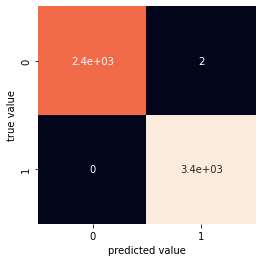

In [ ]:
# Task 4
# requires step 3.2, 4.1
from sklearn.metrics import confusion_matrix

ypred = model.predict(Xtest)

cm = confusion_matrix(ytest, ypred)

printMetrics(cm, "Random Forest Classifier")

## Task 5
Create a new tf-Idf vectorizer with stopword list, train new RFC, and display results

###Step 5.1
Upload stopword list from drive

In [ ]:
# step 5.1

file1 = open('/content/drive/MyDrive/!Data/HW4/stopwords.txt', 'r')
Lines = file1.readlines()

stopwords = []
# Strips the newline character
for line in Lines:
    stopwords.append(line.strip())

# --- Testing --- #
print(stopwords)
# ---   END   --- #

['enron', "'ll", "'tis", "'twas", "'ve", '10', '39', 'a', "a's", 'able', 'ableabout', 'about', 'above', 'abroad', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'ad', 'added', 'adj', 'adopted', 'ae', 'af', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'ag', 'again', 'against', 'ago', 'ah', 'ahead', 'ai', "ain't", 'aint', 'al', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ao', 'apart', 'apparently', 'appear', 'appreciate', 'appropriate', 'approximately', 'aq', 'ar', 'are', 'area', 'areas', 'aren', "aren't", 'arent', 'arise', 'around', 'arpa', 'as', 'aside', 'ask', 'asked', 'asking', 'asks', 'associated', 'at', 'au', 'auth', 'available', 'aw', 'away', 'awfully', 'az', 'b', 'ba', 'back', '

Step 5.1
Create tf-Idf vectorizer with stopwords

In [ ]:
# step 5.2
# requires Step 1.1, 5.1

from sklearn.feature_extraction.text import TfidfVectorizer

tfIdfVectorizer2 = TfidfVectorizer(input = 'filename', use_idf=True, stop_words = stopwords, decode_error='ignore')
tfIdf2 = tfIdfVectorizer2.fit_transform(fileList)

###Step 5.3
Print highest terms for one span and ham file with new TF-IDF

In [ ]:
# Task 5.3
# requires step 5.2

import pandas as pd

print("Spam File: '/content/HW4/Train/GP/part5/msg8746.eml'")
df = pd.DataFrame(tfIdf2[0].T.todense(), index=tfIdfVectorizer2.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

print("Ham File: '/content/HW4/Test/lokay-m/enron_t_s/46'")
df = pd.DataFrame(tfIdf2[-1].T.todense(), index=tfIdfVectorizer2.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

Spam File: '/content/HW4/Train/GP/part5/msg8746.eml'
                                       TF-IDF
yoshigeru                            0.509063
3bf8a0dedc16947d3e194678a            0.509063
3d                                   0.228058
fgmcogesfqumcwcnqamcdwkjhdoacbrmara  0.111859
font                                 0.111044
3d0                                  0.096833
strong                               0.088729
movies                               0.088704
img                                  0.085342
f3todelke                            0.084844
mm7mdweqi                            0.084844
99kxl                                0.084844
7xjn5kp                              0.084844
adiosiba                             0.084844
0poqv                                0.084844
fxg2x3                               0.084844
dlnwooadable                         0.084844
xmomj                                0.084844
4td3av                               0.084844
xmrqtr4j                   

###Step 5.4
Train a new RFC

In [ ]:
# step 5.4
# requires step 3.1 and 5.2

from sklearn.ensemble import RandomForestClassifier

Xtrain2 = tfIdf2[:trainFileCount]
Xtest2 = tfIdf2[trainFileCount:]

ytrain2 = classData[:trainFileCount]
ytest2 = classData[trainFileCount:]

model2 = RandomForestClassifier(n_estimators=100)
model2.fit(Xtrain2, ytrain2)

RandomForestClassifier()

###Step 5.5 
Create predictions with new RFC

For the Random Forest Classifier #2:
False Positive = 3 
False Negative = 0 
True Positive  = 3423 
True Negative  = 2361

For positive values:
     Precision = 99.9124343257443%
        Recall = 100.0%


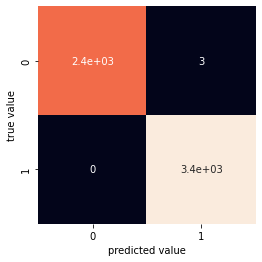

In [ ]:
# step 5.5
# requires step 5.4, 4.1
from sklearn.metrics import confusion_matrix

ypred2 = model2.predict(Xtest2)

cm2 = confusion_matrix(ytest2, ypred2)

printMetrics(cm2, "Random Forest Classifier #2")